In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
FEATURES_SOURCE = 'pca_advanced_features'
train = pd.read_csv('./data/{}/train.csv'.format(FEATURES_SOURCE), index_col=0)
test = pd.read_csv('./data/{}/test.csv'.format(FEATURES_SOURCE), index_col=0)
all_data = train.append(test)

In [3]:
train_X = train.drop('target', axis=1)
train_Y = train[['target']]
test_X = test.drop('target', axis=1)
test_Y = test[['target']]
all_data_X = all_data.drop('target', axis=1)
all_data_Y = all_data[['target']]

In [5]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier

In [6]:
from utils.metrics import get_metrics
from utils.metrics import get_metrics_kfold


<h3> Hyper Parameters Tuning </h3>

<h4> max depth </h4> 

In [7]:
train_errors = []
cnt = 0
test_errors = []
cross_val_scores = []
depths = list(range(1, 10, 1)) + list(range(10, 20, 3)) 
for depth in depths:
    dt = RandomForestClassifier(max_depth=depth, n_estimators=10)
    dt.fit(train_X, train_Y.values.ravel())
    predictions_train = dt.predict(train_X).reshape(-1, 1)
    train_error = get_metrics(train_Y, predictions_train)
    predictions = dt.predict(test_X).reshape(-1, 1)
    test_error = get_metrics(test_Y, predictions)
    cross_val_scores.append(get_metrics_kfold(dt, train_X, train_Y.values.ravel()))
    train_errors.append(train_error)
    test_errors.append(test_error)
    cnt = cnt + 1
    print('\r tuning max depth: {} %'.format(int((cnt / len(depths)) * 100)), end='')
    

 tuning max depth: 7 %

 tuning max depth: 15 %

 tuning max depth: 23 %

 tuning max depth: 30 %

 tuning max depth: 38 %

 tuning max depth: 46 %

 tuning max depth: 53 %

 tuning max depth: 61 %

 tuning max depth: 69 %

 tuning max depth: 76 %

 tuning max depth: 84 %

 tuning max depth: 92 %

 tuning max depth: 100 %

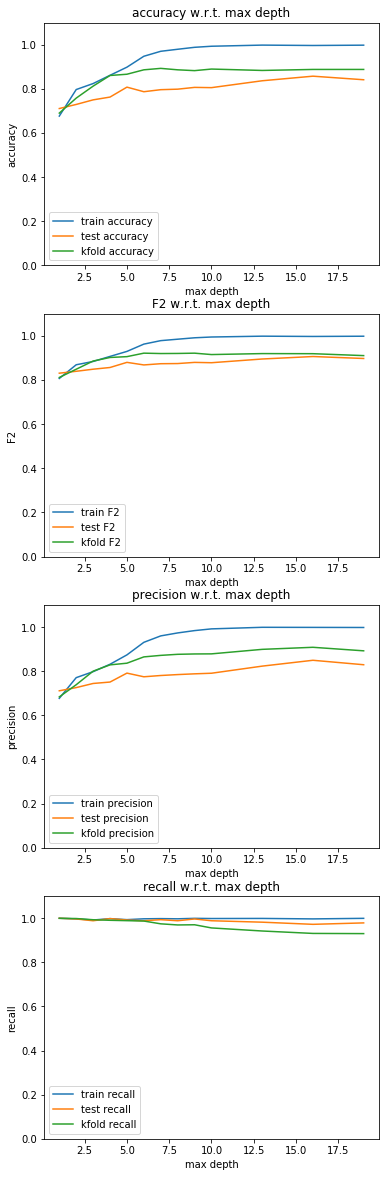

In [11]:
from utils.metrics import VALUE_PARAMETERS

for parameter_i in range(len(VALUE_PARAMETERS)):
    plt.subplot(len(VALUE_PARAMETERS), 1, parameter_i + 1)
    plt.title('{} w.r.t. max depth'.format(VALUE_PARAMETERS[parameter_i]))
    plt.xlabel('max depth')
    plt.ylabel(VALUE_PARAMETERS[parameter_i])
    plt.plot(depths, [train_error[parameter_i] for train_error in train_errors], label='train {}'.format(VALUE_PARAMETERS[parameter_i]))
    plt.plot(depths, [test_error[parameter_i] for test_error in test_errors], label='test {}'.format(VALUE_PARAMETERS[parameter_i]))
    plt.plot(depths, [cross_val_score[parameter_i] for cross_val_score in cross_val_scores], label='kfold {}'.format(VALUE_PARAMETERS[parameter_i]))
    plt.ylim(0,1.1)
    plt.legend()
    plt.subplots_adjust(top=4)


In [13]:
from utils.metrics import ALL_PARAMETERS
best_parameter_to_use = 1  # F2
results = []

train_final_errors = [train_error[best_parameter_to_use] for train_error in train_errors]
best_train_error = max(train_final_errors)
best_train_error_index = train_final_errors.index(max(train_final_errors))
results.append(list(train_errors[best_train_error_index]))


test_final_errors = [test_error[best_parameter_to_use] for test_error in test_errors]
best_test_error = max(test_final_errors)
best_test_error_index = test_final_errors.index(max(test_final_errors))
results.append(list(test_errors[best_train_error_index]))

kfold_final_errors = [kfold_error[best_parameter_to_use] for kfold_error in cross_val_scores]
best_kfold_error = max(kfold_final_errors)
best_kfold_error_index = test_final_errors.index(max(test_final_errors))
results.append(list(cross_val_scores[best_train_error_index]))

result = pd.DataFrame(results, columns=ALL_PARAMETERS)
result['data'] = ['train', 'test', 'kfold']
result


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>accuracy</th>
      <th>F2</th>
      <th>precision</th>
      <th>recall</th>
      <th>confusion_matrix</th>
      <th>data</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>0.998857</td>
      <td>0.999156</td>
      <td>0.999156</td>
      <td>0.999156</td>
      <td>[[1128, 2], [2, 2367]]</td>
      <td>train</td>
    </tr>
    <tr>
      <th>1</th>
      <td>0.837182</td>
      <td>0.895633</td>
      <td>0.823129</td>
      <td>0.982143</td>
      <td>[[120, 130], [11, 605]]</td>
      <td>test</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0.883966</td>
      <td>0.920183</td>
      <td>0.899197</td>
      <td>0.942172</td>
      <td>[[878, 252], [124, 2245]]</td>
      <td>kfold</td>
    </tr>
  </tbody>
</table>
</div>

In [14]:
depths[best_kfold_error_index]

16

<h3> n_estimators </h3>

In [15]:
best_depth = depths[best_kfold_error_index]
train_errors = []
cnt = 0
test_errors = []
cross_val_scores = []
n_estimators = list(range(1, 20, 4)) + list(range(20, 70, 5))
for n_estimator in n_estimators:
    dt = RandomForestClassifier(max_depth=best_depth, n_estimators=n_estimator)
    dt.fit(train_X, train_Y.values.ravel())
    predictions_train = dt.predict(train_X).reshape(-1, 1)
    train_error = get_metrics(train_Y, predictions_train)
    predictions = dt.predict(test_X).reshape(-1, 1)
    test_error = get_metrics(test_Y, predictions)
    cross_val_scores.append(get_metrics_kfold(dt, all_data_X, all_data_Y.values.ravel()))
    train_errors.append(train_error)
    test_errors.append(test_error)
    cnt = cnt + 1
    print('\rtuning n_estimators: {} %'.format(int((cnt / len(n_estimators)) * 100)), end='')
    

tuning n_estimators: 6 %

tuning n_estimators: 13 %

tuning n_estimators: 20 %

tuning n_estimators: 26 %

tuning n_estimators: 33 %

tuning n_estimators: 40 %

tuning n_estimators: 46 %

tuning n_estimators: 53 %

tuning n_estimators: 60 %

tuning n_estimators: 66 %

tuning n_estimators: 73 %

tuning n_estimators: 80 %

tuning n_estimators: 86 %

tuning n_estimators: 93 %

tuning n_estimators: 100 %

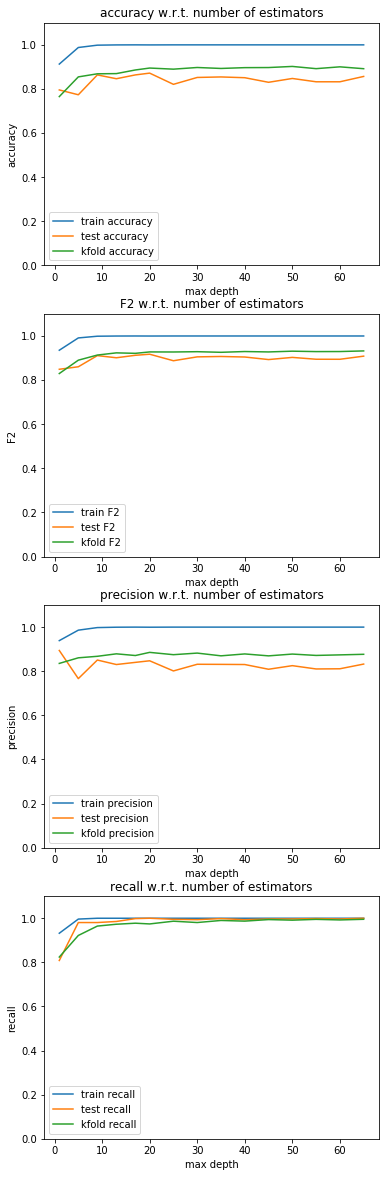

In [17]:
from utils.metrics import VALUE_PARAMETERS

for parameter_i in range(len(VALUE_PARAMETERS)):
    plt.subplot(len(VALUE_PARAMETERS), 1, parameter_i + 1)
    plt.title('{} w.r.t. number of estimators'.format(VALUE_PARAMETERS[parameter_i]))
    plt.xlabel('max depth')
    plt.ylabel(VALUE_PARAMETERS[parameter_i])
    plt.plot(n_estimators, [train_error[parameter_i] for train_error in train_errors], label='train {}'.format(VALUE_PARAMETERS[parameter_i]))
    plt.plot(n_estimators, [test_error[parameter_i] for test_error in test_errors], label='test {}'.format(VALUE_PARAMETERS[parameter_i]))
    plt.plot(n_estimators, [cross_val_score[parameter_i] for cross_val_score in cross_val_scores], label='kfold {}'.format(VALUE_PARAMETERS[parameter_i]))
    plt.ylim(0,1.1)
    plt.legend()
    plt.subplots_adjust(top=4)


In [19]:
best_parameter_to_use = 1  # F2
results = []

train_final_errors = [train_error[best_parameter_to_use] for train_error in train_errors]
best_train_error = max(train_final_errors)
best_train_error_index = train_final_errors.index(max(train_final_errors))
results.append(list(train_errors[best_train_error_index]))


test_final_errors = [test_error[best_parameter_to_use] for test_error in test_errors]
best_test_error = max(test_final_errors)
best_test_error_index = test_final_errors.index(max(test_final_errors))
results.append(list(test_errors[best_train_error_index]))

kfold_final_errors = [kfold_error[best_parameter_to_use] for kfold_error in cross_val_scores]
best_kfold_error = max(kfold_final_errors)
best_kfold_error_index = test_final_errors.index(max(test_final_errors))
results.append(list(cross_val_scores[best_train_error_index]))

result = pd.DataFrame(results, columns=ALL_PARAMETERS)
result['data'] = ['train', 'test', 'kfold']
result


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>accuracy</th>
      <th>F2</th>
      <th>precision</th>
      <th>recall</th>
      <th>confusion_matrix</th>
      <th>data</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>1.000000</td>
      <td>1.000000</td>
      <td>1.000000</td>
      <td>1.000000</td>
      <td>[[1130, 0], [0, 2369]]</td>
      <td>train</td>
    </tr>
    <tr>
      <th>1</th>
      <td>0.863741</td>
      <td>0.912463</td>
      <td>0.840164</td>
      <td>0.998377</td>
      <td>[[133, 117], [1, 615]]</td>
      <td>test</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0.886140</td>
      <td>0.921321</td>
      <td>0.871205</td>
      <td>0.977554</td>
      <td>[[940, 440], [63, 2922]]</td>
      <td>kfold</td>
    </tr>
  </tbody>
</table>
</div>

In [20]:
n_estimators[best_kfold_error_index]

20

In [21]:
name = 'RandomForest_{}.csv'.format(FEATURES_SOURCE)
result.to_csv('./result/models/{}'.format(name), index=False)


<h1> Redundant </h1>

In [85]:
[max(train_final_errors), depths[train_final_errors.index(max(train_final_errors))]]


[1.0, 16]

In [86]:
[max(test_final_errors), depths[test_final_errors.index(max(test_final_errors))]]


[1.0, 1]

In [87]:
[max(cross_final_errors), depths[cross_final_errors.index(max(cross_final_errors))]]


[0.9742043551088777, 2]

In [89]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(train_X, train_Y)
predictions_train = dt.predict(train_X).reshape(-1, 1)
train_error = get_metrics(train_Y, predictions_train)
predictions = dt.predict(test_X).reshape(-1, 1)
test_error = get_metrics(test_Y, predictions)


In [93]:
test_error

(0.7367205542725174, 0.8438356164383561, 0.7298578199052133, 1.0)